In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

mpl.rcParams['axes.unicode_minus']= False

path = 'C:/Windows/Fonts/malgun.ttf'
font_name = fm.FontProperties(fname = path, size = 50).get_name()
plt.rc('font', family=font_name)

In [66]:
df = pd.read_csv('상가업소정보_201912_01.csv', sep='|')
# csv파일을 읽어오는 default는 ',' 읽어오는데 오류가 생길 시에 파일을 열어보고 |같은 구분으로 되어있으면 seperate를 따로 입력해야함
df.head(3)

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,19905471,와라와라호프,NaN,Q,음식,Q09,유흥주점,Q09A01,호프/맥주,I56219,...,1168010600106040000014378,대치상가,서울특별시 강남구 남부순환로 2933,135280,6280.0,NaN,1,NaN,127.061026,37.493922
1,19911397,커피빈코리아선릉로93길점,코리아선릉로93길점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1168010100106960042022041,NaN,서울특별시 강남구 선릉로93길 6,135080,6149.0,NaN,1,NaN,127.047883,37.505675
2,19911801,프로포즈,NaN,Q,음식,Q09,유흥주점,Q09A01,호프/맥주,I56219,...,1154510200101620001017748,NaN,서울특별시 금천구 가산로 34-6,153010,8545.0,NaN,1,NaN,126.899220,37.471711


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573680 entries, 0 to 573679
Data columns (total 39 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   상가업소번호     573680 non-null  int64  
 1   상호명        573679 non-null  object 
 2   지점명        76674 non-null   object 
 3   상권업종대분류코드  573680 non-null  object 
 4   상권업종대분류명   573680 non-null  object 
 5   상권업종중분류코드  573680 non-null  object 
 6   상권업종중분류명   573680 non-null  object 
 7   상권업종소분류코드  573680 non-null  object 
 8   상권업종소분류명   573680 non-null  object 
 9   표준산업분류코드   539290 non-null  object 
 10  표준산업분류명    539290 non-null  object 
 11  시도코드       573680 non-null  int64  
 12  시도명        573680 non-null  object 
 13  시군구코드      573680 non-null  int64  
 14  시군구명       573680 non-null  object 
 15  행정동코드      573680 non-null  int64  
 16  행정동명       573680 non-null  object 
 17  법정동코드      573680 non-null  int64  
 18  법정동명       573680 non-null  object 
 19  지번코드       573680 non-n

In [68]:
df.isnull().sum()

상가업소번호            0
상호명               1
지점명          497006
상권업종대분류코드         0
상권업종대분류명          0
상권업종중분류코드         0
상권업종중분류명          0
상권업종소분류코드         0
상권업종소분류명          0
표준산업분류코드      34390
표준산업분류명       34390
시도코드              0
시도명               0
시군구코드             0
시군구명              0
행정동코드             0
행정동명              0
법정동코드             0
법정동명              0
지번코드              0
대지구분코드            0
대지구분명             0
지번본번지             0
지번부번지         98756
지번주소              0
도로명코드             0
도로명               0
건물본번지             0
건물부번지        501692
건물관리번호            0
건물명          308072
도로명주소             0
구우편번호             0
신우편번호             9
동정보          522824
층정보          226553
호정보          488414
경도                0
위도                0
dtype: int64

<AxesSubplot:>

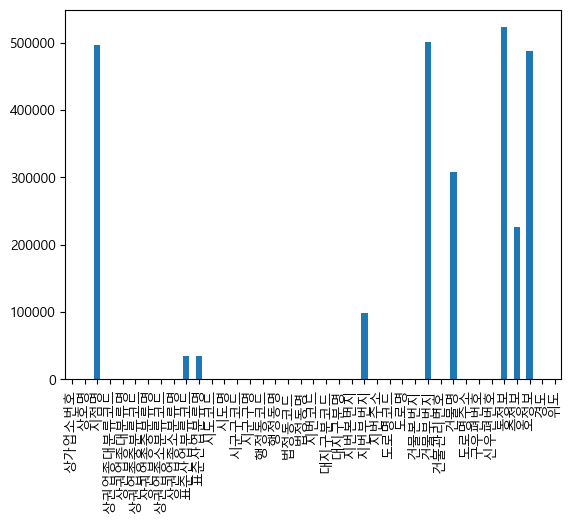

In [69]:
df.isnull().sum().plot(kind='bar')

In [ ]:
# ! 커맨드 명령(리눅스)
!pip install missingno

In [ ]:
import missingno
missingno.matrix(df)

In [21]:
# nan 값 - 값이 비어있음
# nan 값 처리 방식
# 1. nan에 다른 값을 채우는 방법
# 2. nan이 포함된 데이터를 삭제

In [22]:
# nan값이 많이 포함된 상위 9개의 칼럼을 제거

In [70]:
# df.isnull().sum().sort_values()
not_use_cols = df.isnull().sum().sort_values(ascending=False).head(9).index
not_use_cols

Index(['동정보', '건물부번지', '지점명', '호정보', '건물명', '층정보', '지번부번지', '표준산업분류코드',
       '표준산업분류명'],
      dtype='object')

In [71]:
list(not_use_cols)

['동정보', '건물부번지', '지점명', '호정보', '건물명', '층정보', '지번부번지', '표준산업분류코드', '표준산업분류명']

In [72]:
# 1개 드랍
df.drop('동정보', axis=1)

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물부번지,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,층정보,호정보,경도,위도
0,19905471,와라와라호프,NaN,Q,음식,Q09,유흥주점,Q09A01,호프/맥주,I56219,...,NaN,1168010600106040000014378,대치상가,서울특별시 강남구 남부순환로 2933,135280,6280.0,1,NaN,127.061026,37.493922
1,19911397,커피빈코리아선릉로93길점,코리아선릉로93길점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,NaN,1168010100106960042022041,NaN,서울특별시 강남구 선릉로93길 6,135080,6149.0,1,NaN,127.047883,37.505675
2,19911801,프로포즈,NaN,Q,음식,Q09,유흥주점,Q09A01,호프/맥주,I56219,...,6.0,1154510200101620001017748,NaN,서울특별시 금천구 가산로 34-6,153010,8545.0,1,NaN,126.899220,37.471711
3,19912201,싱싱커피&토스트,NaN,Q,음식,Q07,패스트푸드,Q07A10,토스트전문,I56192,...,NaN,2653010400105780000002037,산업용품유통상가,부산광역시 사상구 괘감로 37,617726,46977.0,1,26,128.980455,35.159774
4,19932756,가락사우나내스낵,NaN,F,생활서비스,F09,대중목욕탕/휴게,F09A02,사우나/증기탕/온천,S96121,...,NaN,1171010500102560005010490,NaN,서울특별시 송파구 가락로 71,138846,5690.0,1,NaN,127.104071,37.500249
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
573675,16394290,비파티세리공덕,NaN,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,...,NaN,1144010200101050067001710,NaN,서울특별시 마포구 마포대로14길 4,121801,4211.0,NaN,NaN,126.955059,37.548618
573676,16336474,앤탑PC방,NaN,N,관광/여가/오락,N01,PC/오락/당구/볼링등,N01A01,인터넷PC방,R91222,...,NaN,1120011500102890015004255,으뜸프린팅(주),서울특별시 성동구 성수일로8길 37,133834,4794.0,2,NaN,127.054615,37.545853
573677,16336218,오즈아레나PC방,NaN,N,관광/여가/오락,N01,PC/오락/당구/볼링등,N01A01,인터넷PC방,R91222,...,NaN,1168010800101650008000001,한맥빌딩,서울특별시 강남구 강남대로 492,135825,6119.0,2,NaN,127.024102,37.506202
573678,16335152,파인트리네일,NaN,F,생활서비스,F01,이/미용/건강,F01A02,발/네일케어,S96119,...,NaN,1156011000100230000000001,서울국제금융센터,서울특별시 영등포구 국제금융로 10,150945,7326.0,1,NaN,126.924863,37.525172


In [36]:
# 2개 이상 드랍
df.drop(['동정보','호정보'], axis=1)

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물본번지,건물부번지,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,층정보,경도,위도
0,19905471,와라와라호프,NaN,Q,음식,Q09,유흥주점,Q09A01,호프/맥주,I56219,...,2933,NaN,1168010600106040000014378,대치상가,서울특별시 강남구 남부순환로 2933,135280,6280.0,1,127.061026,37.493922
1,19911397,커피빈코리아선릉로93길점,코리아선릉로93길점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,6,NaN,1168010100106960042022041,NaN,서울특별시 강남구 선릉로93길 6,135080,6149.0,1,127.047883,37.505675
2,19911801,프로포즈,NaN,Q,음식,Q09,유흥주점,Q09A01,호프/맥주,I56219,...,34,6.0,1154510200101620001017748,NaN,서울특별시 금천구 가산로 34-6,153010,8545.0,1,126.899220,37.471711
3,19912201,싱싱커피&토스트,NaN,Q,음식,Q07,패스트푸드,Q07A10,토스트전문,I56192,...,37,NaN,2653010400105780000002037,산업용품유통상가,부산광역시 사상구 괘감로 37,617726,46977.0,1,128.980455,35.159774
4,19932756,가락사우나내스낵,NaN,F,생활서비스,F09,대중목욕탕/휴게,F09A02,사우나/증기탕/온천,S96121,...,71,NaN,1171010500102560005010490,NaN,서울특별시 송파구 가락로 71,138846,5690.0,1,127.104071,37.500249
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
573675,16394290,비파티세리공덕,NaN,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,...,4,NaN,1144010200101050067001710,NaN,서울특별시 마포구 마포대로14길 4,121801,4211.0,NaN,126.955059,37.548618
573676,16336474,앤탑PC방,NaN,N,관광/여가/오락,N01,PC/오락/당구/볼링등,N01A01,인터넷PC방,R91222,...,37,NaN,1120011500102890015004255,으뜸프린팅(주),서울특별시 성동구 성수일로8길 37,133834,4794.0,2,127.054615,37.545853
573677,16336218,오즈아레나PC방,NaN,N,관광/여가/오락,N01,PC/오락/당구/볼링등,N01A01,인터넷PC방,R91222,...,492,NaN,1168010800101650008000001,한맥빌딩,서울특별시 강남구 강남대로 492,135825,6119.0,2,127.024102,37.506202
573678,16335152,파인트리네일,NaN,F,생활서비스,F01,이/미용/건강,F01A02,발/네일케어,S96119,...,10,NaN,1156011000100230000000001,서울국제금융센터,서울특별시 영등포구 국제금융로 10,150945,7326.0,1,126.924863,37.525172


In [73]:
# 리스트를 이용한 드랍
df = df.drop(list(not_use_cols), axis=1)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573680 entries, 0 to 573679
Data columns (total 30 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   상가업소번호     573680 non-null  int64  
 1   상호명        573679 non-null  object 
 2   상권업종대분류코드  573680 non-null  object 
 3   상권업종대분류명   573680 non-null  object 
 4   상권업종중분류코드  573680 non-null  object 
 5   상권업종중분류명   573680 non-null  object 
 6   상권업종소분류코드  573680 non-null  object 
 7   상권업종소분류명   573680 non-null  object 
 8   시도코드       573680 non-null  int64  
 9   시도명        573680 non-null  object 
 10  시군구코드      573680 non-null  int64  
 11  시군구명       573680 non-null  object 
 12  행정동코드      573680 non-null  int64  
 13  행정동명       573680 non-null  object 
 14  법정동코드      573680 non-null  int64  
 15  법정동명       573680 non-null  object 
 16  지번코드       573680 non-null  int64  
 17  대지구분코드     573680 non-null  int64  
 18  대지구분명      573680 non-null  object 
 19  지번본번지      573680 non-n

In [74]:
df[['상호명', '도로명주소', '위도', '경도']]

,상호명,도로명주소,위도,경도
0,와라와라호프,서울특별시 강남구 남부순환로 2933,37.493922,127.061026
1,커피빈코리아선릉로93길점,서울특별시 강남구 선릉로93길 6,37.505675,127.047883
2,프로포즈,서울특별시 금천구 가산로 34-6,37.471711,126.899220
3,싱싱커피&토스트,부산광역시 사상구 괘감로 37,35.159774,128.980455
4,가락사우나내스낵,서울특별시 송파구 가락로 71,37.500249,127.104071
...,...,...,...,...
573675,비파티세리공덕,서울특별시 마포구 마포대로14길 4,37.548618,126.955059
573676,앤탑PC방,서울특별시 성동구 성수일로8길 37,37.545853,127.054615
573677,오즈아레나PC방,서울특별시 강남구 강남대로 492,37.506202,127.024102
573678,파인트리네일,서울특별시 영등포구 국제금융로 10,37.525172,126.924863


In [75]:
df['상권업종대분류명'].unique()

array(['음식', '생활서비스', '소매', '의료', '학문/교육', '관광/여가/오락', '부동산', '숙박', '스포츠'],
      dtype=object)

In [76]:
df['상권업종중분류명'].unique()

array(['유흥주점', '커피점/카페', '패스트푸드', '대중목욕탕/휴게', '일식/수산물', '분식', '한식',
       '음/식료품소매', '건강/미용식품', '선물/팬시/기념품', '양식', '중식', '종합소매점', '병원',
       '화장품소매', '학원-어학', '의복의류', 'PC/오락/당구/볼링등', '별식/퓨전요리', '학원-자격/국가고시',
       '도서관/독서실', '가정/주방/인테리어', '학원-음악미술무용', '무도/유흥/가무', '이/미용/건강',
       '사진/광학/정밀기기소매', '세탁/가사서비스', '닭/오리요리', '책/서적/도서', '예식/의례/관혼상제',
       '광고/인쇄', '학원-예능취미체육', '운송/배달/택배', '기타음식업', '부동산중개', '주유소/충전소',
       '철물/난방/건설자재소매', '유아교육', '주택수리', '사무/문구/컴퓨터', '약국/한약방', '물품기기대여',
       '자동차/이륜차', '자동차/자동차용품', '가구소매', '개인/가정용품수리', '학원-보습교습입시', '기타판매업',
       '유사의료업', '학원기타', '개인서비스', '시계/귀금속소매', '사진', '요가/단전/마사지', '학문교육기타',
       '가방/신발/액세서리', '대행업', '페인트/유리제품소매', '중고품소매/교환', '인력/고용/용역알선',
       '애견/애완/동물', '음식배달서비스', '가전제품소매', '유아용품', '학원-컴퓨터', '기타서비스업',
       '운동/경기용품소매', '장례/묘지', '법무세무회계', '취미/오락관련소매', '연극/영화/극장',
       '평가/개발/관리', '수의업', '호텔/콘도', '모텔/여관/여인숙', '분양', '제과제빵떡케익',
       '학원-창업취업취미', '의약/의료품소매', '행사/이벤트', '경마/경륜/성인오락', '예술품/골동품/수석/분재',
       '부페', '의료관련서비스업'

In [77]:
df['상권업종소분류명'].unique()

array(['호프/맥주', '커피전문점/카페/다방', '토스트전문', '사우나/증기탕/온천', '음식점-초밥전문',
       '라면김밥분식', '피자전문', '갈비/삼겹살', '한식/백반/한정식', '아구전문', '청과물소매', '도너츠전문',
       '건강원', '토산품/기념품점', '낙지/오징어', '정통양식/경양식', '중국음식/중국집', '종합소매',
       '바베큐전문', '내과/외과', '생식판매', '패스트푸드', '건강식품판매', '기타병원', '부대찌개/섞어찌개',
       '룸살롱/단란주점', '해장국/감자탕', '빠/카페/스탠드빠', '화장품판매점', '다이어트상품판매',
       '국수/만두/칼국수', '음식점-일식', '학원-외국어/어학', '한복/갈옷/민속옷', '기원', '식료품점',
       '아이스크림판매', '샤브샤브전문', '셔츠/내의/속옷', '학원-보석감정', '횟집', '독서실',
       '인테리어/욕실용품/커튼', '학원-국악', '노래방', '욕탕업-종합', '여성미용실', '소아과', '안경원',
       '홍어전문', '방앗간/정미소', '후라이드/양념치킨', '도시락전문점', '지도판매', '폐백전문', '남성미용실',
       '인쇄종합', '선물용품판매', '서예/서화/미술', '정형/성형외과', '태권도장', '종합이삿짐대행',
       '광고대행-전화번호부', '구내식당/자급식음식점', '부동산중개', '참치전문점', '한의원', '주유소',
       '셔터/새시판매', '어린이집', '배관난방보일러', '간판제작종합', '냉동식품판매', '철물/건설자재소매',
       '치과의원', '조명기구/전기용품', '일반병원', '사무/문구용품', '피아노/바이올린/기타', '약국', '렌트카',
       '자동차정비/카센타', '자동차부품판매', '중고자동차판매', '일반가구소매', '개인/가정용품수리-종합',
       '학원-입시', 'LPG판매', '

In [81]:
import numpy as np
s= pd.Series([np.random.randint(10) for _ in range(10)])
s

0    6
1    7
2    2
3    1
4    3
5    9
6    1
7    3
8    4
9    8
dtype: int64

In [88]:
(s > 5).values

array([ True,  True, False, False, False,  True, False, False, False,
        True])

In [86]:
s.iloc[(s > 5).values]

0    6
1    7
5    9
9    8
dtype: int64

In [89]:
df['상권업종대분류명'] == '음식'

0          True
1          True
2          True
3          True
4         False
          ...  
573675     True
573676    False
573677    False
573678    False
573679    False
Name: 상권업종대분류명, Length: 573680, dtype: bool

In [91]:
df.loc[df['상권업종대분류명'] == '음식'] # boolean indexing

,상가업소번호,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,시도코드,시도명,...,지번주소,도로명코드,도로명,건물본번지,건물관리번호,도로명주소,구우편번호,신우편번호,경도,위도
0,19905471,와라와라호프,Q,음식,Q09,유흥주점,Q09A01,호프/맥주,11,서울특별시,...,서울특별시 강남구 대치동 604,116802000003,서울특별시 강남구 남부순환로,2933,1168010600106040000014378,서울특별시 강남구 남부순환로 2933,135280,6280.0,127.061026,37.493922
1,19911397,커피빈코리아선릉로93길점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,11,서울특별시,...,서울특별시 강남구 역삼동 696-42,116804166502,서울특별시 강남구 선릉로93길,6,1168010100106960042022041,서울특별시 강남구 선릉로93길 6,135080,6149.0,127.047883,37.505675
2,19911801,프로포즈,Q,음식,Q09,유흥주점,Q09A01,호프/맥주,11,서울특별시,...,서울특별시 금천구 독산동 162-1,115453117003,서울특별시 금천구 가산로,34,1154510200101620001017748,서울특별시 금천구 가산로 34-6,153010,8545.0,126.899220,37.471711
3,19912201,싱싱커피&토스트,Q,음식,Q07,패스트푸드,Q07A10,토스트전문,26,부산광역시,...,부산광역시 사상구 괘법동 578,265303139004,부산광역시 사상구 괘감로,37,2653010400105780000002037,부산광역시 사상구 괘감로 37,617726,46977.0,128.980455,35.159774
5,19983535,초밥왕,Q,음식,Q03,일식/수산물,Q03A03,음식점-초밥전문,11,서울특별시,...,서울특별시 송파구 신천동 7-28,117103123023,서울특별시 송파구 올림픽로,293,1171010200100070028000237,서울특별시 송파구 올림픽로 293-19,138735,5510.0,127.102490,37.515149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
573658,16373442,브레드앤로즈,Q,음식,Q08,제과제빵떡케익,Q08A01,제과점,11,서울특별시,...,서울특별시 성동구 성수동1가 685-704,112003005011,서울특별시 성동구 왕십리로,63,1120011400106850704000001,서울특별시 성동구 왕십리로 63,133923,4769.0,127.043565,37.543610
573669,16311392,스테프핫도그,Q,음식,Q07,패스트푸드,Q07A04,패스트푸드,11,서울특별시,...,서울특별시 마포구 마포동 418-1,114404139166,서울특별시 마포구 마포대로4다길,41,1144010700104180001024197,서울특별시 마포구 마포대로4다길 41,121734,4177.0,126.943989,37.535121
573670,16311360,평창갈비,Q,음식,Q01,한식,Q01A02,갈비/삼겹살,11,서울특별시,...,서울특별시 송파구 방이동 165-3,117102123002,서울특별시 송파구 위례성대로,98,1171011100101650003017145,서울특별시 송파구 위례성대로 98,138833,5636.0,127.122565,37.513543
573671,16372354,휴돈정,Q,음식,Q06,양식,Q06A02,돈가스전문점,11,서울특별시,...,서울특별시 노원구 공릉동 383-12,113504130183,서울특별시 노원구 동일로191가길,6,1135010300103830012013938,서울특별시 노원구 동일로191가길 6,139801,1852.0,127.071622,37.625316


In [92]:
df.loc[df['시군구명'] == '강남구']

,상가업소번호,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,시도코드,시도명,...,지번주소,도로명코드,도로명,건물본번지,건물관리번호,도로명주소,구우편번호,신우편번호,경도,위도
0,19905471,와라와라호프,Q,음식,Q09,유흥주점,Q09A01,호프/맥주,11,서울특별시,...,서울특별시 강남구 대치동 604,116802000003,서울특별시 강남구 남부순환로,2933,1168010600106040000014378,서울특별시 강남구 남부순환로 2933,135280,6280.0,127.061026,37.493922
1,19911397,커피빈코리아선릉로93길점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,11,서울특별시,...,서울특별시 강남구 역삼동 696-42,116804166502,서울특별시 강남구 선릉로93길,6,1168010100106960042022041,서울특별시 강남구 선릉로93길 6,135080,6149.0,127.047883,37.505675
26,20014818,쉼터,Q,음식,Q04,분식,Q04A01,라면김밥분식,11,서울특별시,...,서울특별시 강남구 삼성동 159,116803122004,서울특별시 강남구 봉은사로,524,1168010500101590000017116,서울특별시 강남구 봉은사로 524,135798,6164.0,127.057100,37.512939
27,20015136,배제현의웰빙낙지한마리수제비,Q,음식,Q03,일식/수산물,Q03A13,낙지/오징어,11,서울특별시,...,서울특별시 강남구 신사동 512-13,116804166021,서울특별시 강남구 강남대로152길,19,1168010700105120013027367,서울특별시 강남구 강남대로152길 19,135887,6035.0,127.020945,37.517574
38,20024149,타워광명내과의원,S,의료,S01,병원,S01B07,내과/외과,11,서울특별시,...,서울특별시 강남구 도곡동 467-14,116804166604,서울특별시 강남구 언주로30길,39,1168011800104670014000001,서울특별시 강남구 언주로30길 39,135270,6292.0,127.053198,37.488742
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
573668,16336261,킹덤코리아,D,소매,D01,음/식료품소매,D01A13,청과물소매,11,서울특별시,...,서울특별시 강남구 역삼동 720-9,116804166737,서울특별시 강남구 테헤란로38길,5,1168010100107200009023380,서울특별시 강남구 테헤란로38길 5,135920,6221.0,127.041635,37.501642
573672,16369396,심스틸러,D,소매,D05,의복의류,D05A02,캐쥬얼/스포츠의류,11,서울특별시,...,서울특별시 강남구 논현동 16-40,116804166019,서울특별시 강남구 강남대로146길,7,1168010800100160040006612,서울특별시 강남구 강남대로146길 7,135811,6038.0,127.020698,37.514833
573673,16369383,밀리온골프,D,소매,D05,의복의류,D05A02,캐쥬얼/스포츠의류,11,서울특별시,...,서울특별시 강남구 신사동 648-8,116804166279,서울특별시 강남구 도산대로49길,21,1168010700106480008010395,서울특별시 강남구 도산대로49길 21,135896,6020.0,127.036900,37.524247
573674,16314679,헤리티크뉴욕,D,소매,D05,의복의류,D05A12,예복/웨딩드레스,11,서울특별시,...,서울특별시 강남구 신사동 650-7,116804166277,서울특별시 강남구 도산대로45길,16,1168010700106500007010544,서울특별시 강남구 도산대로45길 16-9,135896,6021.0,127.036036,37.523645


In [95]:
(df['상권업종대분류명'] == '음식') & (df['시군구명'] == '강남구')

0          True
1          True
2         False
3         False
4         False
          ...  
573675    False
573676    False
573677    False
573678    False
573679    False
Length: 573680, dtype: bool

In [96]:
# 음식 + 강남구
df[(df['상권업종대분류명'] == '음식') & (df['시군구명'] == '강남구')]

,상가업소번호,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,시도코드,시도명,...,지번주소,도로명코드,도로명,건물본번지,건물관리번호,도로명주소,구우편번호,신우편번호,경도,위도
0,19905471,와라와라호프,Q,음식,Q09,유흥주점,Q09A01,호프/맥주,11,서울특별시,...,서울특별시 강남구 대치동 604,116802000003,서울특별시 강남구 남부순환로,2933,1168010600106040000014378,서울특별시 강남구 남부순환로 2933,135280,6280.0,127.061026,37.493922
1,19911397,커피빈코리아선릉로93길점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,11,서울특별시,...,서울특별시 강남구 역삼동 696-42,116804166502,서울특별시 강남구 선릉로93길,6,1168010100106960042022041,서울특별시 강남구 선릉로93길 6,135080,6149.0,127.047883,37.505675
26,20014818,쉼터,Q,음식,Q04,분식,Q04A01,라면김밥분식,11,서울특별시,...,서울특별시 강남구 삼성동 159,116803122004,서울특별시 강남구 봉은사로,524,1168010500101590000017116,서울특별시 강남구 봉은사로 524,135798,6164.0,127.057100,37.512939
27,20015136,배제현의웰빙낙지한마리수제비,Q,음식,Q03,일식/수산물,Q03A13,낙지/오징어,11,서울특별시,...,서울특별시 강남구 신사동 512-13,116804166021,서울특별시 강남구 강남대로152길,19,1168010700105120013027367,서울특별시 강남구 강남대로152길 19,135887,6035.0,127.020945,37.517574
39,20027817,마깐바냑,Q,음식,Q04,분식,Q04A01,라면김밥분식,11,서울특별시,...,서울특별시 강남구 역삼동 831-45,116803122008,서울특별시 강남구 역삼로,109,1168010100108310045025632,서울특별시 강남구 역삼로 109,135080,6242.0,127.031005,37.493653
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
573504,16384209,강남농수산,Q,음식,Q03,일식/수산물,Q03A02,음식점-일식,11,서울특별시,...,서울특별시 강남구 율현동 108-9,116804166840,서울특별시 강남구 헌릉로745길,25,1168011300101080009000001,서울특별시 강남구 헌릉로745길 25,135190,6378.0,127.119159,37.469284
573521,16358477,풍,Q,음식,Q03,일식/수산물,Q03A02,음식점-일식,11,서울특별시,...,서울특별시 강남구 논현동 183-4,116804166009,서울특별시 강남구 강남대로118길,20,1168010800101830004009259,서울특별시 강남구 강남대로118길 20,135827,6120.0,127.025047,37.506579
573545,16360984,올드캡,Q,음식,Q07,패스트푸드,Q07A04,패스트푸드,11,서울특별시,...,서울특별시 강남구 논현동 234-2,116804166114,서울특별시 강남구 논현로114길,10,1168010800102340002008759,서울특별시 강남구 논현로114길 10,135830,6109.0,127.034194,37.508564
573554,16359503,흑화당,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,11,서울특별시,...,서울특별시 강남구 대치동 989,116803122005,서울특별시 강남구 삼성로,238,1168010600109890000013946,서울특별시 강남구 삼성로 238,135501,6282.0,127.061386,37.498629


In [100]:
df_seoul_food = df[(df['상권업종대분류명'] == '음식') & (df['시도명'] == '서울특별시')]

In [101]:
df_seoul_food.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 132889 entries, 0 to 573675
Data columns (total 30 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   상가업소번호     132889 non-null  int64  
 1   상호명        132889 non-null  object 
 2   상권업종대분류코드  132889 non-null  object 
 3   상권업종대분류명   132889 non-null  object 
 4   상권업종중분류코드  132889 non-null  object 
 5   상권업종중분류명   132889 non-null  object 
 6   상권업종소분류코드  132889 non-null  object 
 7   상권업종소분류명   132889 non-null  object 
 8   시도코드       132889 non-null  int64  
 9   시도명        132889 non-null  object 
 10  시군구코드      132889 non-null  int64  
 11  시군구명       132889 non-null  object 
 12  행정동코드      132889 non-null  int64  
 13  행정동명       132889 non-null  object 
 14  법정동코드      132889 non-null  int64  
 15  법정동명       132889 non-null  object 
 16  지번코드       132889 non-null  int64  
 17  대지구분코드     132889 non-null  int64  
 18  대지구분명      132889 non-null  object 
 19  지번본번지      132889 non-n

In [102]:
 # '구'별로 음식점 중분류 단위로 몇 개씩 존재

In [106]:
df_seoul_food.head()

,상가업소번호,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,시도코드,시도명,...,지번주소,도로명코드,도로명,건물본번지,건물관리번호,도로명주소,구우편번호,신우편번호,경도,위도
0,19905471,와라와라호프,Q,음식,Q09,유흥주점,Q09A01,호프/맥주,11,서울특별시,...,서울특별시 강남구 대치동 604,116802000003,서울특별시 강남구 남부순환로,2933,1168010600106040000014378,서울특별시 강남구 남부순환로 2933,135280,6280.0,127.061026,37.493922
1,19911397,커피빈코리아선릉로93길점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,11,서울특별시,...,서울특별시 강남구 역삼동 696-42,116804166502,서울특별시 강남구 선릉로93길,6,1168010100106960042022041,서울특별시 강남구 선릉로93길 6,135080,6149.0,127.047883,37.505675
2,19911801,프로포즈,Q,음식,Q09,유흥주점,Q09A01,호프/맥주,11,서울특별시,...,서울특별시 금천구 독산동 162-1,115453117003,서울특별시 금천구 가산로,34,1154510200101620001017748,서울특별시 금천구 가산로 34-6,153010,8545.0,126.899220,37.471711
5,19983535,초밥왕,Q,음식,Q03,일식/수산물,Q03A03,음식점-초밥전문,11,서울특별시,...,서울특별시 송파구 신천동 7-28,117103123023,서울특별시 송파구 올림픽로,293,1171010200100070028000237,서울특별시 송파구 올림픽로 293-19,138735,5510.0,127.102490,37.515149
6,19964615,석봉토스트,Q,음식,Q07,패스트푸드,Q07A10,토스트전문,11,서울특별시,...,서울특별시 광진구 구의동 77-47,112154112444,서울특별시 광진구 자양로39길,20,1121510300100770047020647,서울특별시 광진구 자양로39길 20,143200,4992.0,127.088387,37.549245


In [109]:
#unstack() 테이블 형식으로 보여줌
df_seoul_food.groupby(['시군구명', '상권업종중분류명']).상호명.count().unstack()

상권업종중분류명,기타음식업,닭/오리요리,별식/퓨전요리,부페,분식,양식,유흥주점,음식배달서비스,일식/수산물,제과제빵떡케익,중식,커피점/카페,패스트푸드,한식
시군구명,,,,,,,,,,,,,,
강남구,47.0,539.0,341.0,63.0,1197.0,1573.0,1573.0,11.0,1255.0,650.0,358.0,2790.0,786.0,4371.0
강동구,4.0,318.0,138.0,24.0,509.0,154.0,737.0,4.0,379.0,223.0,93.0,584.0,224.0,1636.0
강북구,2.0,208.0,97.0,6.0,329.0,63.0,475.0,4.0,203.0,134.0,55.0,259.0,123.0,1209.0
강서구,16.0,323.0,145.0,21.0,531.0,260.0,869.0,2.0,441.0,256.0,126.0,765.0,259.0,1753.0
관악구,11.0,324.0,118.0,11.0,461.0,183.0,790.0,6.0,324.0,165.0,109.0,516.0,196.0,1336.0
광진구,11.0,453.0,188.0,25.0,655.0,275.0,1142.0,1.0,490.0,270.0,194.0,810.0,278.0,2020.0
구로구,6.0,289.0,121.0,23.0,429.0,97.0,691.0,6.0,282.0,169.0,226.0,551.0,180.0,1322.0
금천구,9.0,176.0,102.0,9.0,268.0,75.0,413.0,1.0,225.0,94.0,93.0,369.0,100.0,1003.0
노원구,10.0,345.0,99.0,12.0,476.0,132.0,482.0,6.0,300.0,239.0,95.0,547.0,259.0,1227.0


In [110]:
df_seoul_acade = df[(df['상권업종대분류명'] == '학문/교육') & (df['시도명'] == '서울특별시')]

In [111]:
df_seoul_acade

,상가업소번호,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,시도코드,시도명,...,지번주소,도로명코드,도로명,건물본번지,건물관리번호,도로명주소,구우편번호,신우편번호,경도,위도
85,20776515,GIA보석교육원,R,학문/교육,R03,학원-자격/국가고시,R03A11,학원-보석감정,11,서울특별시,...,서울특별시 강남구 신사동 639-3,116803122007,서울특별시 강남구 압구정로,320,1168010700106390003009673,서울특별시 강남구 압구정로 320,135896,6017.0,127.036437,37.528532
101,20736806,안재형영어,R,학문/교육,R04,학원-어학,R04A01,학원-외국어/어학,11,서울특별시,...,서울특별시 양천구 목동 905-34,114703114003,서울특별시 양천구 목동서로,133,1147010200109050034000001,서울특별시 양천구 목동서로 133-2,158050,7988.0,126.875973,37.531592
121,20769711,정아트,R,학문/교육,R05,학원-음악미술무용,R05A01,서예/서화/미술,11,서울특별시,...,서울특별시 강서구 염창동 184-8,115004145427,서울특별시 강서구 양천로73가길,21,1150010100101840008028367,서울특별시 강서구 양천로73가길 21,157861,7541.0,126.873645,37.550924
126,20887860,경찰태권도,R,학문/교육,R07,학원-예능취미체육,R07A20,태권도장,11,서울특별시,...,서울특별시 성북구 길음동 1283-4,112903107001,서울특별시 성북구 길음로,20,1129013400112830004000001,서울특별시 성북구 길음로 20,136110,2725.0,127.023020,37.604749
134,20924451,아트인스튜디오,R,학문/교육,R05,학원-음악미술무용,R05A01,서예/서화/미술,11,서울특별시,...,서울특별시 강남구 역삼동 818-1,116804166038,서울특별시 강남구 강남대로96길,12,1168010100108180001023766,서울특별시 강남구 강남대로96길 12,135080,6129.0,127.028054,37.499729
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
573529,16357981,쌤통수학교습소,R,학문/교육,R01,학원-보습교습입시,R01A01,학원-입시,11,서울특별시,...,서울특별시 서대문구 홍제동 106,114104136386,서울특별시 서대문구 통일로34길,24,1141011100101060000013753,서울특별시 서대문구 통일로34길 24,120854,3633.0,126.949389,37.585709
573654,16368651,골든벨독서실,R,학문/교육,R10,도서관/독서실,R10A01,독서실,11,서울특별시,...,서울특별시 양천구 신월동 447-5,114703005067,서울특별시 양천구 월정로,56,1147010300104470005013226,서울특별시 양천구 월정로 56,158834,7931.0,126.841706,37.524719
573656,16311412,에이디링크연구소,R,학문/교육,R09,학원기타,R09A01,학원(종합),11,서울특별시,...,서울특별시 송파구 가락동 76,117104169368,서울특별시 송파구 양재대로62길,47,1171010700100760000006992,서울특별시 송파구 양재대로62길 47,138803,5713.0,127.120757,37.495986
573661,16368385,도무스링구아,R,학문/교육,R01,학원-보습교습입시,R01A01,학원-입시,11,서울특별시,...,서울특별시 서초구 우면동 721-1,116503121020,서울특별시 서초구 태봉로,70,1165010300101510004000001,서울특별시 서초구 태봉로 70,137131,6764.0,127.025571,37.464531


In [113]:
df_se_ibsi = df_seoul_acade[df_seoul_acade['상권업종소분류명'] == '학원-입시']

<AxesSubplot:xlabel='시군구명'>

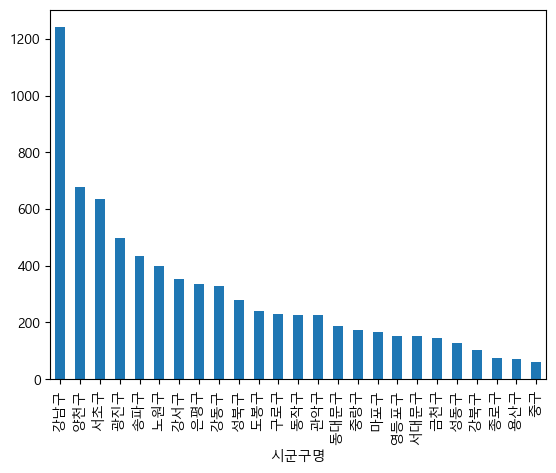

In [119]:
df_se_ibsi.groupby('시군구명').상호명.count().sort_values(ascending=False).plot(kind='bar')

<AxesSubplot:xlabel='경도', ylabel='위도'>

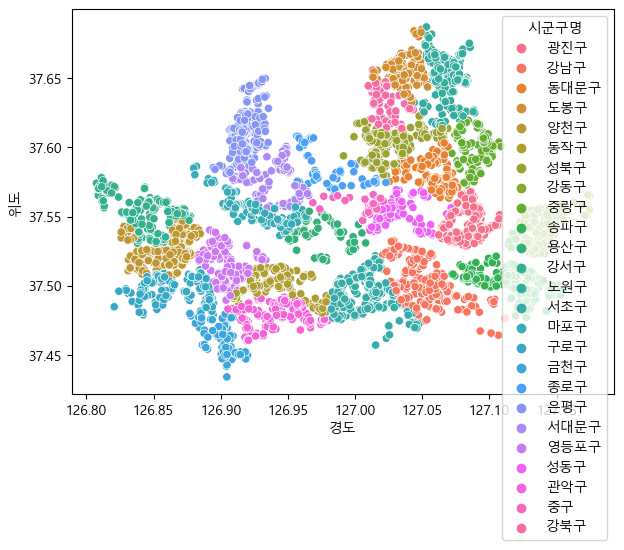

In [121]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df_se_ibsi, x='경도', y='위도', hue = '시군구명')